# Import Library

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Import Dataset

In [9]:
df = pd.read_csv('USA_HOUSING.csv')
df.head()


,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address,longitude,latitude
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",-114.31,34.19
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",-114.47,34.40
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",-114.56,33.69
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,-114.57,33.64
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,-114.57,33.57


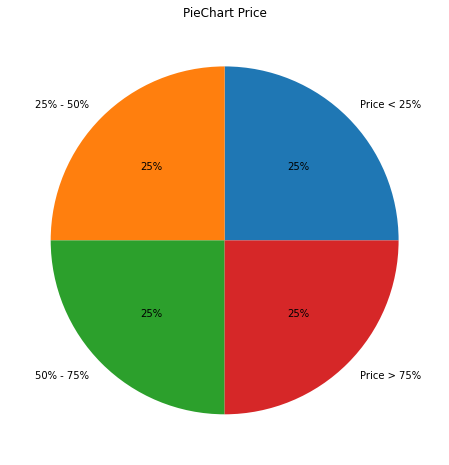

<Figure size 432x288 with 0 Axes>

In [10]:
# mylabels = ["a"]
# plt.pie(a, labels = mylabels)
# plt.show() 
a = df['Price'].loc[lambda x : x < 997577].count() # dibawah 25%
b = df.query("Price >= 997577 & Price <= 1232670")['House Age'].count() # diantara 25% - 50%
c = df.query("Price > 1232670 & Price <= 1471210")['House Age'].count() # diantara 50% - 75%
d = df['Price'].loc[lambda x : x > 1471210].count() # diatas 75%

y = np.array([a, b, c, d])
plt.figure(figsize=(10,8))
mylabels = ["Price < 25%", "25% - 50%", "50% - 75%", "Price > 75%"]
plt.title("PieChart Price")

plt.pie(y, labels = mylabels, autopct='%.0f%%')
plt.show()
plt.savefig('price_piechart.jpg', dpi=75)

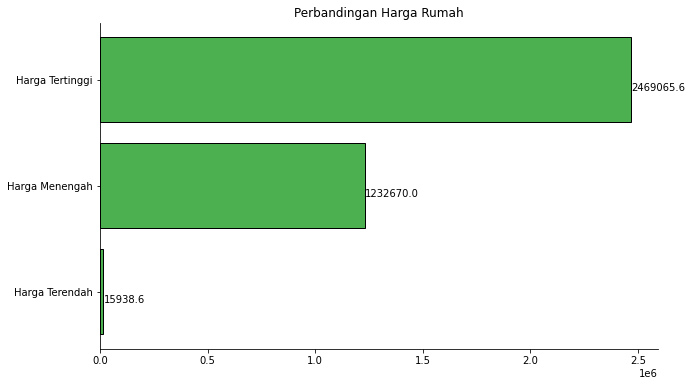

<Figure size 432x288 with 0 Axes>

In [11]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
ax = fig.add_subplot(111)
plt.title('Perbandingan Harga Rumah')

counts = [15938.65,1232670,2469065.59]

y_ax = ("Harga Terendah","Harga Menengah","Harga Tertinggi")
y_tick = np.arange(len(y_ax))

ax.barh(range(len(counts)), counts, align = "center", color = "#4CAF50",edgecolor='black')
ax.set_yticks(y_tick)
ax.set_yticklabels(y_ax, size = 10)

#annotate bar plot with values
for i in ax.patches:
    ax.text(i.get_width()+.09, i.get_y()+.3, str(round((i.get_width()), 1)), fontsize=10)

sns.despine()
plt.show();

plt.savefig('price_rentang.jpg', dpi=75)

In [12]:
df.columns

Index(['Area Income', 'House Age', 'Number of Rooms', 'Number of Bedrooms',
       'Area Population', 'Price', 'Address', 'longitude', 'latitude'],
      dtype='object')

*   Penjelasan Setiap Kolom
 
 1. Area Income = Rata - rata pendapatan penduduk dikota yang sama dengan rumah tersebut
 2. House Age = Usia rumah tersebut
 3. Number of Rooms = Jumlah Kamar dikota yang sama
 4. Number of Bedrooms = Jumlah Kamar tidur dikota yang sama
 5. Area Population	 = Populasi kota tempat rumah tersebut
 6. price = Harga dari rumah (US$)
 7. Address = Alamat rumah (longitude dan latitude)


# Handling Missing Value

In [13]:
# Melihat jumlah baris pada dataset

df.shape

(5000, 9)

In [14]:
# Melihat nilai kosong pada dataset

df.isnull().sum()

Area Income           0
House Age             0
Number of Rooms       0
Number of Bedrooms    0
Area Population       0
Price                 0
Address               0
longitude             0
latitude              0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area Income         5000 non-null   float64
 1   House Age           5000 non-null   float64
 2   Number of Rooms     5000 non-null   float64
 3   Number of Bedrooms  5000 non-null   float64
 4   Area Population     5000 non-null   float64
 5   Price               5000 non-null   float64
 6   Address             5000 non-null   object 
 7   longitude           5000 non-null   float64
 8   latitude            5000 non-null   float64
dtypes: float64(8), object(1)
memory usage: 351.7+ KB


**Dataset tidak memiliki nilai kosong**



# Statistik Data

In [16]:
# melihat statistik data

df.describe()

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,longitude,latitude
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,-117.482700,33.631748
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,0.552238,0.555978
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,-118.110000,32.540000
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05,-117.930000,33.150000
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06,-117.625000,33.790000
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06,-117.140000,34.040000
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06,-114.310000,36.640000


In [17]:
# Merubah tipe data kolom Rooms, Bedrooms, population dari float menjadi int

df["Number of Rooms"] = df["Number of Rooms"].astype("int") 
df["Number of Bedrooms"] = df["Number of Bedrooms"].astype("int") 
df["Area Population"] = df["Area Population"].astype("int") 


In [18]:
# Hasil update dataset

df.describe()

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,longitude,latitude
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5.000000e+03,5000.000000,5000.000000
mean,68583.108984,5.977222,6.492200,3.732400,36163.01500,1.232073e+06,-117.482700,33.631748
std,10657.991214,0.991456,1.048503,1.225843,9925.64664,3.531176e+05,0.552238,0.555978
min,17796.631190,2.644304,3.000000,2.000000,172.00000,1.593866e+04,-118.110000,32.540000
25%,61480.562388,5.322283,6.000000,3.000000,29403.75000,9.975771e+05,-117.930000,33.150000
50%,68804.286404,5.970429,7.000000,4.000000,36199.00000,1.232669e+06,-117.625000,33.790000
75%,75783.338666,6.650808,7.000000,4.000000,42861.00000,1.471210e+06,-117.140000,34.040000
max,107701.748378,9.519088,10.000000,6.000000,69621.00000,2.469066e+06,-114.310000,36.640000


# Exploratory Data Analysis (EDA)

In [19]:
df.columns

Index(['Area Income', 'House Age', 'Number of Rooms', 'Number of Bedrooms',
       'Area Population', 'Price', 'Address', 'longitude', 'latitude'],
      dtype='object')

## Korelasi Variabel

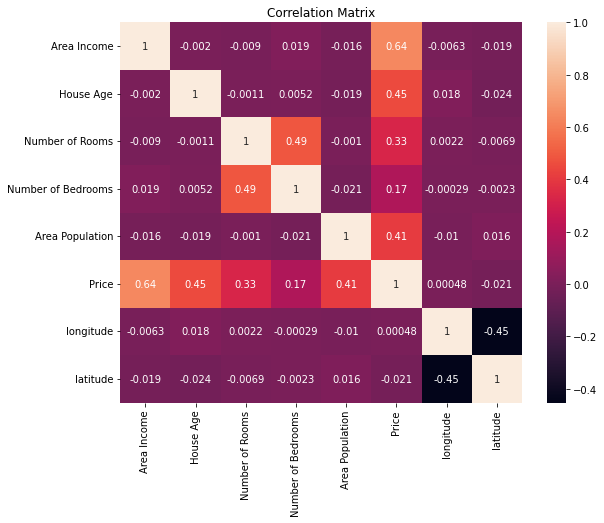

In [20]:
plt.figure(figsize=(9,7))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True)

plt.savefig('heatmap.jpg', dpi=200)

In [21]:
df.corr()["Price"].sort_values(ascending=False)

Price                 1.000000
Area Income           0.639734
House Age             0.452543
Area Population       0.408556
Number of Rooms       0.325114
Number of Bedrooms    0.172429
longitude             0.000484
latitude             -0.020564
Name: Price, dtype: float64

**Kesimpulan**


*   Variabel Area Income memiliki korelasi yang paling tinggi diantara variabel yang lain
*  Variabel Address tidak mempengaruhi karena berupa teks



## Sebaran Data Variabel Price

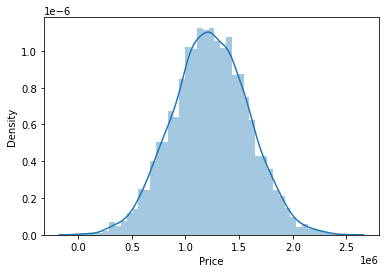

In [22]:
# Melihat sebaran data price

sns.distplot(df['Price'])
plt.savefig('price_histogram.jpg',bbox_inches='tight', dpi=75)

**Kesimpulan**

*   Sebaran data price terdistribusi normal.



## Melihat Distribusi Data Tiap Variabel Yang Digunakan

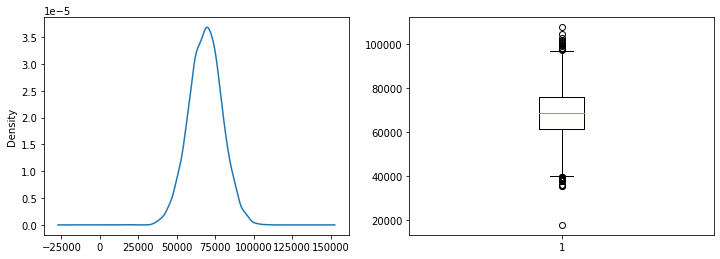

In [23]:
# Melihat distribusi dari Area Income

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Area Income'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Area Income'])
plt.show()

**Kesimpulan**

* Sebagian besar pendapatan berada diangka 75000
* Data memiliki sedikit outliers

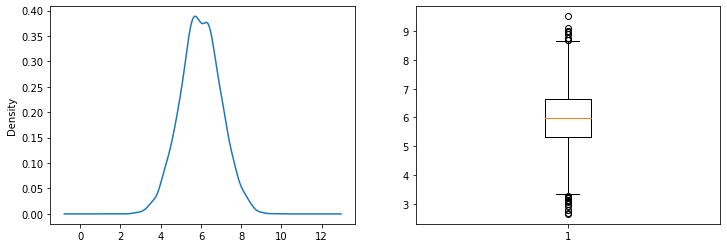

In [24]:
# Melihat distribusi dari House Age

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['House Age'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['House Age'])
plt.show()

**Kesimpulan**

* sebagian besar usia rumah adalah 6 tahun
* Data memiliki sedikit outliers

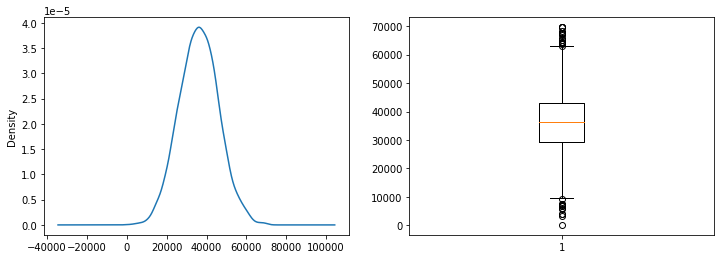

In [25]:
# Melihat distribusi dari Area Population
# Data berupa continous/numerik, maka digunakan histogram garis

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Area Population'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Area Population'])
plt.show()

**Kesimpulan**

* Sebagian besar populasi berada pada nilai 35000
* Data memiliki sedikit outliers.

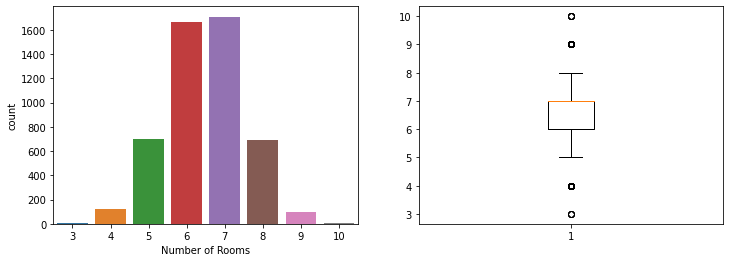

In [26]:
# Melihat distribusi dari Number of Rooms

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['Number of Rooms'])
# plt.savefig('jumlah_kamar.jpg',bbox_inches='tight', dpi=75)

f.add_subplot(1,2,2)
plt.boxplot(df['Number of Rooms'])
plt.show()

**Kesimpulan**

* Sebagian besar rumah memiliki jumlah kamar 6 dan 7
* Data memiliki outliers.

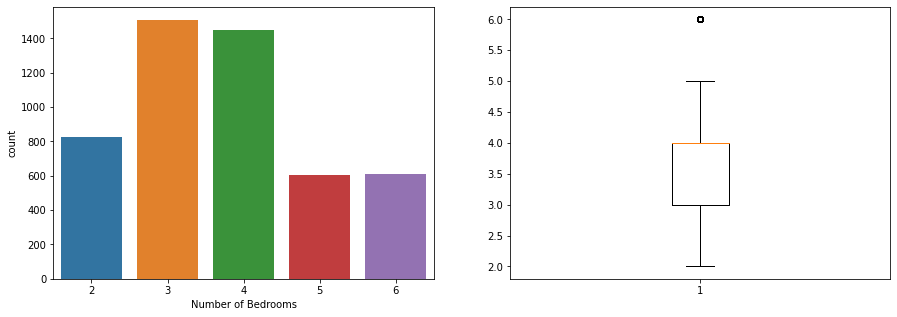

In [27]:
# Melihat distribusi dari Number of Bedrooms

f = plt.figure(figsize=(15,5))

f.add_subplot(1,2,1)
sns.countplot(df['Number of Bedrooms'])
# plt.savefig('jumlah_tempat tidur.jpg',bbox_inches='tight', dpi=75)
f.add_subplot(1,2,2)
plt.boxplot(df['Number of Bedrooms'])
plt.show()

**Kesimpulan**

* Sebagian besar rumah memiliki jumlah kamar tidur siap pakai 3 dan 4
* Data memiliki outliers.

## Hubungan antara independent dan dependent variabel

<Figure size 720x576 with 0 Axes>

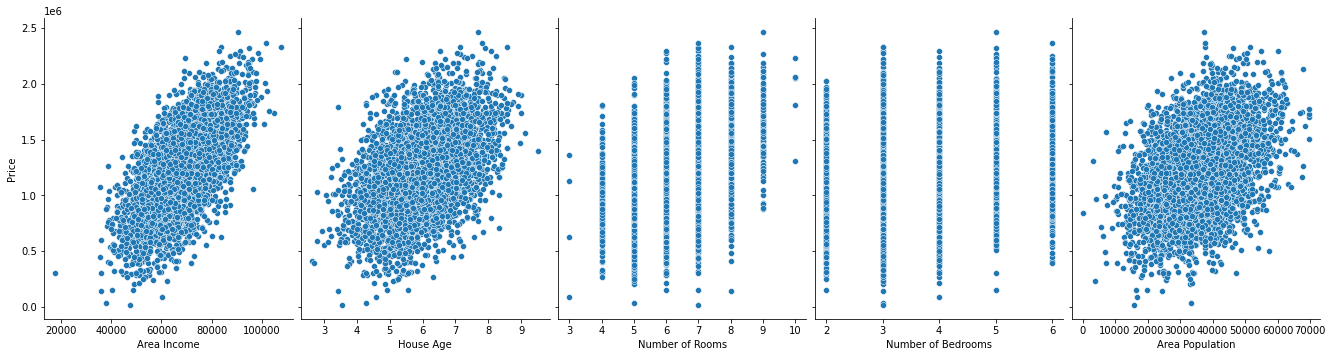

In [28]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=df.drop(['Price', 'Address', 'longitude', 'latitude'], axis=1), y_vars=['Price'], size=5, aspect=0.75)
plt.show()



---



---



# Modelling

In [29]:
df.head()

,Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address,longitude,latitude
0,79545.458574,5.682861,7,4,23086,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",-114.31,34.19
1,79248.642455,6.002900,6,3,40173,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",-114.47,34.40
2,61287.067179,5.865890,8,5,36882,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",-114.56,33.69
3,63345.240046,7.188236,5,3,34310,1.260617e+06,USS Barnett\nFPO AP 44820,-114.57,33.64
4,59982.197226,5.040555,7,4,26354,6.309435e+05,USNS Raymond\nFPO AE 09386,-114.57,33.57


In [30]:
# Buat variabel x dan y

X = df.drop(['Price','Address','longitude', 'latitude'], axis=1)
y = df['Price']

## Split Dataset

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 5)
(4000,)
(1000, 5)
(1000,)


## Linear Regression

In [32]:
from sklearn.metrics import r2_score

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

print(f'R² score: {r2_score(y_test, lin_reg.predict(x_test))*100}')

R² score: 91.08666226612624


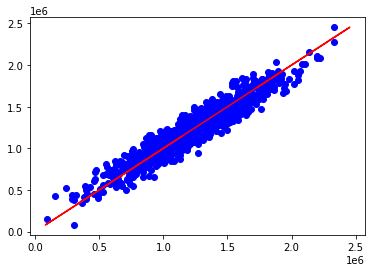

In [34]:
# Linear Regression Graph

plt.scatter(y_test,lin_reg.predict(x_test), color="b")
plt.plot(lin_reg.predict(x_test),lin_reg.predict(x_test), color="r")

## Polynomial Regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 3)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.fit_transform(x_test)

lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly_train,y_train)


print(f'R² score: {r2_score(y_test, lin_reg2.predict(x_poly_test))*100}')

R² score: 89.79668911756238


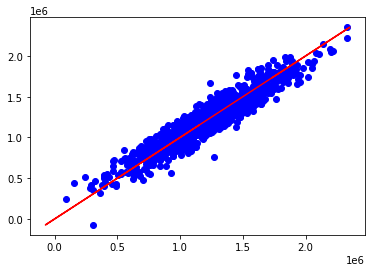

In [36]:
# Polynomial Regression Graph

plt.scatter(y_test,lin_reg2.predict(x_poly_test), color="b")
plt.plot(lin_reg2.predict(x_poly_test),lin_reg2.predict(x_poly_test), color="r")

## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(x_train,y_train)

print(f'R² score: {r2_score(y_test, r_dt.predict(x_test))*100}')

R² score: 73.19904481112361


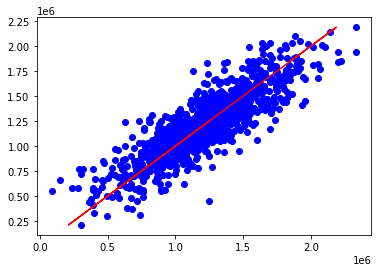

In [38]:
# Decision Tree - Regression Graph

plt.scatter(y_test,r_dt.predict(x_test), color="b")
plt.plot(r_dt.predict(x_test),r_dt.predict(x_test), color="r") 

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor(n_estimators = 100,random_state=0)
rf_reg.fit(x_train,y_train)

print(f'R² score: {r2_score(y_test, rf_reg.predict(x_test))*100}')

R² score: 86.79771486598966


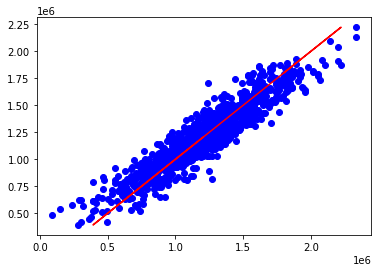

In [40]:
# Random Forest - Regression Graph

plt.scatter(y_test,rf_reg.predict(x_test), color="b")
plt.plot(rf_reg.predict(x_test),rf_reg.predict(x_test), color="r") 

# Komparasi

In [41]:
def evaluate_model(model, x_test, y_test):

    from sklearn import metrics

    # Prediksi data uji 
    y_pred = model.predict(x_test)

    # Menghitung akurasi, presisi, recall, f1-score, dan kappa score
    acc = model.score(x_test,y_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  

    return {'acc': acc, 'mae': mae, 'mse': mse, 'rmse': rmse}

In [42]:
linear_eval = evaluate_model(lin_reg, x_test, y_test)
poly_eval = evaluate_model(lin_reg2, x_poly_test, y_test)
dt_eval = evaluate_model(r_dt, x_test, y_test)
rf_eval = evaluate_model(rf_reg, x_test, y_test)



print('Accuracy:', linear_eval['acc'])
print('MAE:', linear_eval['mae'])
print('MSE:', linear_eval['mse'])
print('RMSE:', linear_eval['rmse'])

Accuracy: 0.9108666226612624
MAE: 84521.96485698876
MSE: 11188938458.487627
RMSE: 105777.77866115182


In [43]:
keys = linear_eval.keys()
values = zip(linear_eval.values(), poly_eval.values(), dt_eval.values(), rf_eval.values())
dictionary = dict(zip(keys, values))

print(dictionary)

{'acc': (0.9108666226612624, 0.8979668911756238, 0.7319904481112361, 0.8679771486598966), 'mae': (84521.96485698876, 89953.91080657128, 142987.06062010277, 103014.37838034233), 'mse': (11188938458.487627, 12808245456.979387, 33643316027.103603, 16572866448.722383), 'rmse': (105777.77866115182, 113173.51923917267, 183421.14389323714, 128735.64560261615)}


In [44]:
data = pd.DataFrame(dictionary, index=['Linear Regression','Polynomial Regression','Decision Tree','Random Forest'])
data

,acc,mae,mse,rmse
Linear Regression,0.910867,84521.964857,1.118894e+10,105777.778661
Polynomial Regression,0.897967,89953.910807,1.280825e+10,113173.519239
Decision Tree,0.731990,142987.060620,3.364332e+10,183421.143893
Random Forest,0.867977,103014.378380,1.657287e+10,128735.645603


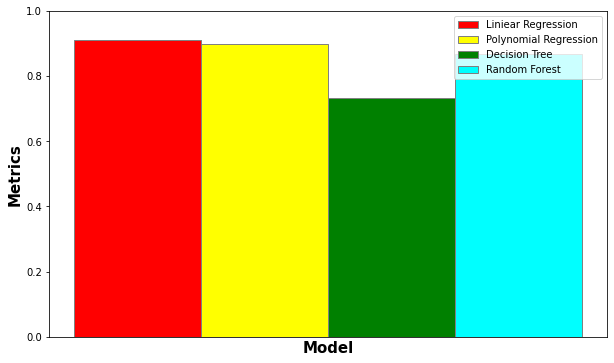

In [45]:
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(10, 6))


# set height of bar
linear_score = [linear_eval['acc']]
poly_score= [poly_eval['acc']]
dt_score = [dt_eval['acc']]
rf_score = [rf_eval['acc']]

#Set position of bar on X axis
br1 = np.arange(len(linear_score))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]


# Make the plot
plt.bar(br1, linear_score, color ='red', width = barWidth ,
		edgecolor ='grey', label ='Liniear Regression')
plt.bar(br2, poly_score, color ='yellow', width =barWidth ,
		edgecolor ='grey', label ='Polynomial Regression')
plt.bar(br3, dt_score, color ='green', width =barWidth,
		edgecolor ='grey', label ='Decision Tree')
plt.bar(br4, rf_score, color ='cyan', width = barWidth,
		edgecolor ='grey', label ='Random Forest')


# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Metrics', fontweight ='bold', fontsize = 15)
plt.ylim(0,1)
plt.xticks([])

plt.legend()
plt.show()


**Kesimpulan**

1. Model dengan akurasi terbaik adalah model dengan linear regression

## Model Regresi 

In [58]:
#Model Summary 
import statsmodels.api as sm 
reg = sm.add_constant(x_train)
mdl = sm.OLS(y_train, reg).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     7838.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:53:26   Log-Likelihood:                -52008.
No. Observations:                4000   AIC:                         1.040e+05
Df Residuals:                    3994   BIC:                         1.041e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.496e+06   1.96e+04   -127.210      0.000   -2.53e+06   -2.46e+06
Area Income           21.5723      0.160    135.238      0.000      21.260      21.885
House Age           1.643e+05   1715.334     95.789      0.000    1.61e+05    1.68e+05
Number of Rooms     1.096e+05   1853.188     59.136      0.000    1.06e+05    1.13e+05
Number of Bedrooms  1066.6097   1581.684      0.674      0.500   -2034.373    4167.592
Area Population       15.2428      0.173     88.009      0.000      14.903      15.582
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.283
Skew:                          -0.010   Prob(JB):                        0.526
Kurtosis:                       2.915   Cond. No.                     9.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Deployment

In [47]:
import warnings
warnings.filterwarnings("ignore")

example = np.array([[25000, 6, 8, 5, 38000]])
price = lin_reg.predict((example))

print(f"harga jual rumah yang tersedia {price[0]:.2f} US$ ")

harga jual rumah yang tersedia 490363.73 US$ 


In [48]:
# scale_data = scaled.fit_transform(example)
# normal_data = scaled.inverse_transform(scale_data)

# print(f"""scaled data = {scale_data}
# normal data = {normal_data} """)

In [49]:
# import pickle

# with open('model_predict_home','wb') as file:
#   pickle.dump(lin_reg,file)

In [50]:
# with open('model_predict_home','rb') as file:
#   myModel = pickle.load(file)

# Simpan Model dengan Joblib

In [51]:
import joblib

In [52]:
joblib.dump((lin_reg), "model_predict_home_price.pkl")

['model_predict_home_price.pkl']

In [53]:
# panggil model

model= joblib.load('model_predict_home_price.pkl')

In [54]:
print(model)

LinearRegression()


In [55]:
# testing

model.predict((example))

array([490363.72843991])